<h1 align=center>Customer Churn Reduction </h1>

This is a customer churn reduction project at a US-based online retailer. In this project, I

**Data source**: Chen, D. (2015). Online Retail [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5BW33.

**Dataset information**: The data set belongs to a leading online E-Commerce company. An online retail (E commerce) company wants to know the customers who are going to churn, so accordingly they can approach customer to offer some promos.

---

1. Problem framing
2. Data wrangling and exploratory data analysis
3. Insights and recommendations

---

# Stage 1: Problem framing

> Familiarize with the problem: What is the problem we are trying to solve, why do we need to solve it, and how can we solve it?

Customer churn is the number of existing customers lost, for any reason at all, over a given period of time. It provides companies with an understanding of customer satisfaction and customer loyalty, and can identify potential changes in a company’s bottom line.

**Potential drivers of increased churn rates include:**
- General market trend: customers are becoming less loyal, spend less
- Increased competition: 
    - New competitors
    - Increased efforts by existing competitors to attract and retain customers
- Decreased attractiveness of our brand
    - Drop in customer satisfaction
    - Drop in attractiveness of our offering (pricing, product selection, delivery and support options) 
- Decreased effectiveness of our customer retention programme
    - Loyalty programme
    - Marketing communication (frequency, relevance)
    - CRM

**Potential interventions includes:**
- General interventions:
    - Enhancements to our offering, relative to competitors
    - Enhancements to when, how, and via which channel we communicate to regular customers
- Targeted inverventions for high-risk customers (e.g. targeted offers)

---

# Stage 2: Exploratory data analysis and data wrangling

> Familiarize with the data: What data are we working with and what does it look like?

## 1. Import required libraries and the dataset

In [558]:
# Import packages
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime
import calendar
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns 

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set_theme(color_codes=True)

In [559]:
# Import data
description = pd.read_excel('/Users/huykha/datasets/ecommerce-customer-churn/E Commerce Dataset.xlsx', sheet_name='Data Dict', header=1, usecols=[1,2,3])
df = pd.read_excel('/Users/huykha/datasets/ecommerce-customer-churn/E Commerce Dataset.xlsx', sheet_name='E Comm')
description

,Data,Variable,Discerption
0,E Comm,CustomerID,Unique customer ID
1,E Comm,Churn,Churn Flag
2,E Comm,Tenure,Tenure of customer in organization
3,E Comm,PreferredLoginDevice,Preferred login device of customer
4,E Comm,CityTier,City tier
5,E Comm,WarehouseToHome,Distance in between warehouse to home of customer
6,E Comm,PreferredPaymentMode,Preferred payment method of customer
7,E Comm,Gender,Gender of customer
8,E Comm,HourSpendOnApp,Number of hours spend on mobile application or...
9,E Comm,NumberOfDeviceRegistered,Total number of deceives is registered on part...


## 2. Data overview

### Check the first three rows
Let's look at the first 3 rows of both dataframes to see what the data looks like

In [560]:
df.head(3).T

,0,1,2
CustomerID,50001,50002,50003
Churn,1,1,1
Tenure,4.0,NaN,NaN
PreferredLoginDevice,Mobile Phone,Phone,Phone
CityTier,3,1,1
WarehouseToHome,6.0,8.0,30.0
PreferredPaymentMode,Debit Card,UPI,Debit Card
Gender,Female,Male,Male
HourSpendOnApp,3.0,3.0,2.0
NumberOfDeviceRegistered,3,4,4


### Quick summary of the dataset

In [561]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

This dataset has 20 columns and 5630 rows. It looks like it contains a lot of missing data. You can see that all of the `datetime` related columns are not currently in datetime format. We will need to convert these later.

### Check for missing data

In [562]:
# Check for missing data
for col in df.columns:
    if df[col].isnull().sum() > 0:
        print(col)
        print(f'The number of missing values for {col}: ', df[col].isnull().sum())
        print(f"Number of distinct values for {col}: ", df[col].nunique())
        print(f'Datatype: ', df[col].dtypes)
        print()

Tenure
The number of missing values for Tenure:  264
Number of distinct values for Tenure:  36
Datatype:  float64

WarehouseToHome
The number of missing values for WarehouseToHome:  251
Number of distinct values for WarehouseToHome:  34
Datatype:  float64

HourSpendOnApp
The number of missing values for HourSpendOnApp:  255
Number of distinct values for HourSpendOnApp:  6
Datatype:  float64

OrderAmountHikeFromlastYear
The number of missing values for OrderAmountHikeFromlastYear:  265
Number of distinct values for OrderAmountHikeFromlastYear:  16
Datatype:  float64

CouponUsed
The number of missing values for CouponUsed:  256
Number of distinct values for CouponUsed:  17
Datatype:  float64

OrderCount
The number of missing values for OrderCount:  258
Number of distinct values for OrderCount:  16
Datatype:  float64

DaySinceLastOrder
The number of missing values for DaySinceLastOrder:  307
Number of distinct values for DaySinceLastOrder:  22
Datatype:  float64



### Check for duplicates

In [563]:
df.duplicated().sum()

np.int64(0)

This dataset has 0 duplicated entries.

### Check for distinct values

In [564]:
# Check the number of distinct values of each column
for col in df.columns:
    print(col)
    print(f"Number of distinct values for {col}: ", df[col].nunique())
    print(f"The distinct values for {col}: ", df[col].unique())
    print(f'The data type is: ', df[col].dtypes)
    print()

CustomerID
Number of distinct values for CustomerID:  5630
The distinct values for CustomerID:  [50001 50002 50003 ... 55628 55629 55630]
The data type is:  int64

Churn
Number of distinct values for Churn:  2
The distinct values for Churn:  [1 0]
The data type is:  int64

Tenure
Number of distinct values for Tenure:  36
The distinct values for Tenure:  [ 4. nan  0. 13. 11.  9. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.
  6. 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17. 50. 60. 31. 51.
 61.]
The data type is:  float64

PreferredLoginDevice
Number of distinct values for PreferredLoginDevice:  3
The distinct values for PreferredLoginDevice:  ['Mobile Phone' 'Phone' 'Computer']
The data type is:  object

CityTier
Number of distinct values for CityTier:  3
The distinct values for CityTier:  [3 1 2]
The data type is:  int64

WarehouseToHome
Number of distinct values for WarehouseToHome:  34
The distinct values for WarehouseToHome:  [  6.   8.  30.  15.  12.  22.  11.   9.  31.  1

## 3. Data wrangling

### Transforming data type into the right format

In [565]:
df['CustomerID'] = df['CustomerID'].astype('object')
df['Churn'] = df['Churn'].astype('object')
df['CityTier'] = df['CityTier'].astype('object')
df['Complain'] = df['Complain'].astype('object')
df.dtypes

CustomerID                      object
Churn                           object
Tenure                         float64
PreferredLoginDevice            object
CityTier                        object
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                        object
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

### Handling missing data

Missing data is a typical problem that can significantly affect your model's accuracy. Here are a few strategies to address this problem:

- **Imputation:** Replace missing values with a statistical measure such as the mean, median, or mode of the column. For categorical variables, the most frequent category can be used.
- **Deletion:** Remove rows or columns with missing values, particularly if the proportion of missing data is small. However, this should be done cautiously to avoid losing valuable information.
- **Flagging:** Create a new binary column that flags whether data was missing in the original data set. This can help your model learn if the absence of data is itself informative.

First lets go about filling the missing values by the median values -> Mean and median values are very close for all the above variables hence we will prefer filling the median values.

In [566]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
OrderAmountHikeFromlastYear,5365.0,15.707922,3.675485,11.0,13.00,15.00,18.0000,26.00
CouponUsed,5374.0,1.751023,1.894621,0.0,1.00,1.00,2.0000,16.00
OrderCount,5372.0,3.008004,2.939680,1.0,1.00,2.00,3.0000,16.00
DaySinceLastOrder,5323.0,4.543491,3.654433,0.0,2.00,3.00,7.0000,46.00


In [567]:
# Handle missing data with imputation with the median
for i in df.columns:
    if df[i].isnull().sum() > 0:
        df[i].fillna(df[i].median(),inplace=True)

### Grouping categorical columns and numerical columns

In [568]:
cat=[]
num=[]
for i in df.columns:
  if df[i].dtype=='object':
    cat.append(i)
  else:
    num.append(i)
print('cat = ',cat)
print('num = ',num)

cat =  ['CustomerID', 'Churn', 'PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus', 'Complain']
num =  ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


## 4. Exploratory data analysis

### Descriptive statistics

In [569]:
df.describe()

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000
mean,10.134103,15.566785,2.934636,3.688988,3.066785,4.214032,15.674600,1.716874,2.961812,4.459325,177.223030
std,8.357951,8.345961,0.705528,1.023999,1.380194,2.583586,3.591058,1.857640,2.879248,3.570626,49.207036
min,0.000000,5.000000,0.000000,1.000000,1.000000,1.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,3.000000,9.000000,2.000000,3.000000,2.000000,2.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,9.000000,14.000000,3.000000,4.000000,3.000000,3.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,15.000000,20.000000,3.000000,4.000000,4.000000,6.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,61.000000,127.000000,5.000000,6.000000,5.000000,22.000000,26.000000,16.000000,16.000000,46.000000,324.990000


### Value distribution

#### Distribution of categorical variables

In [570]:
df[cat].columns

Index(['CustomerID', 'Churn', 'PreferredLoginDevice', 'CityTier',
       'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus',
       'Complain'],
      dtype='object')

In [571]:
for i in cat:
    
     # If column is customerID skip
    if i == 'CustomerID':
        continue
    
    print(i)
    print()
    print(df[i].value_counts())
    print()
    print()

Churn

Churn
0    4682
1     948
Name: count, dtype: int64


PreferredLoginDevice

PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64


CityTier

CityTier
1    3666
3    1722
2     242
Name: count, dtype: int64


PreferredPaymentMode

PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64


Gender

Gender
Male      3384
Female    2246
Name: count, dtype: int64


PreferedOrderCat

PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: int64


MaritalStatus

MaritalStatus
Married     2986
Single      1796
Divorced     848
Name: count, dtype: int64


Complain

Complain
0    4026
1    1604
Name: count, dtype: int64




In [572]:
def plot_stacked_bars(dataframe, title_, size_=(30, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Customer (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

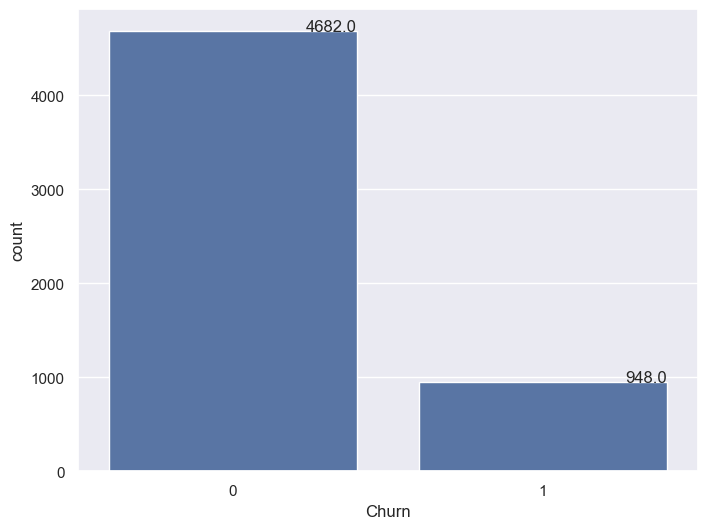

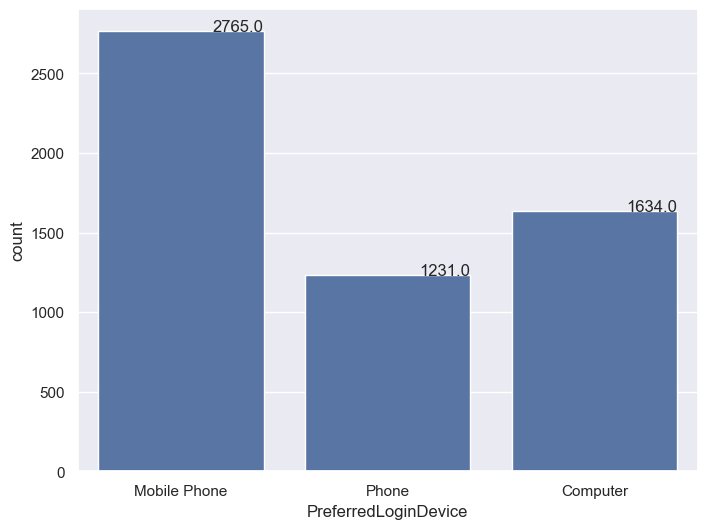

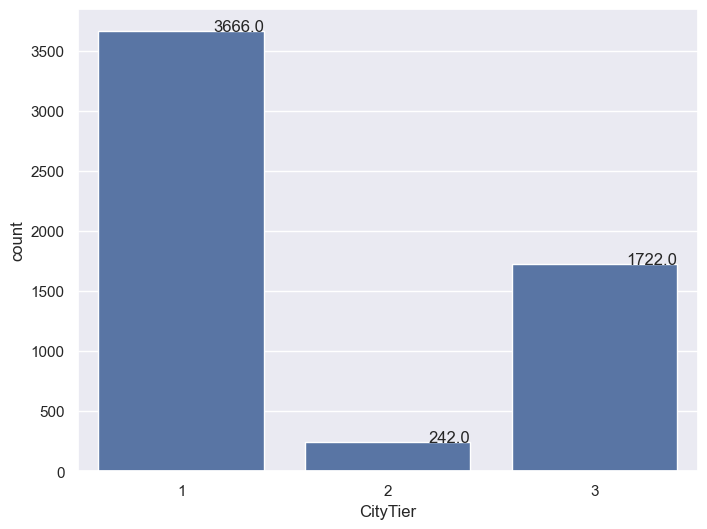

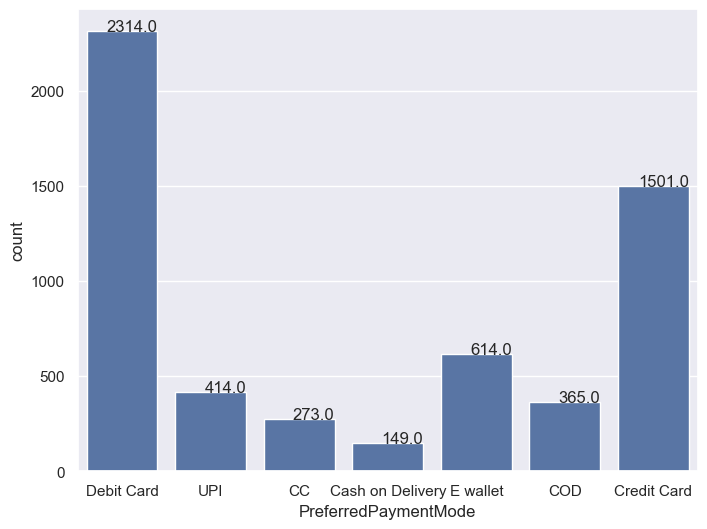

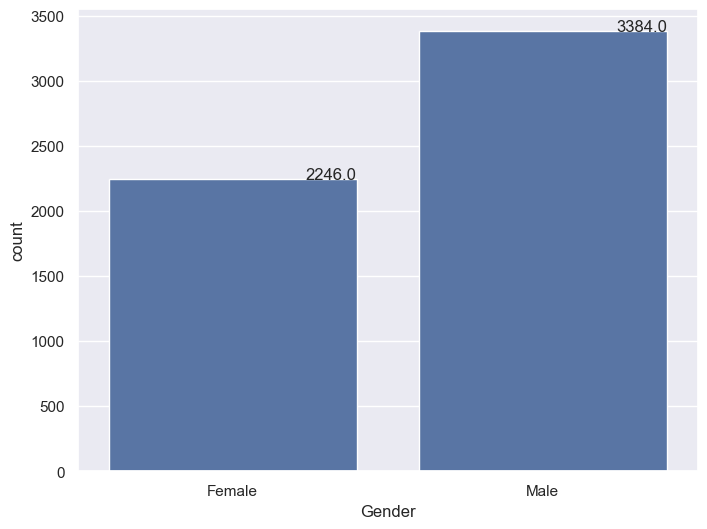

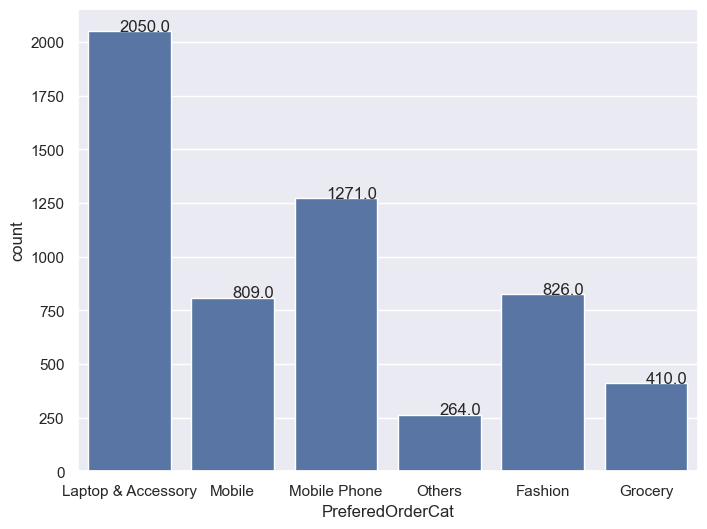

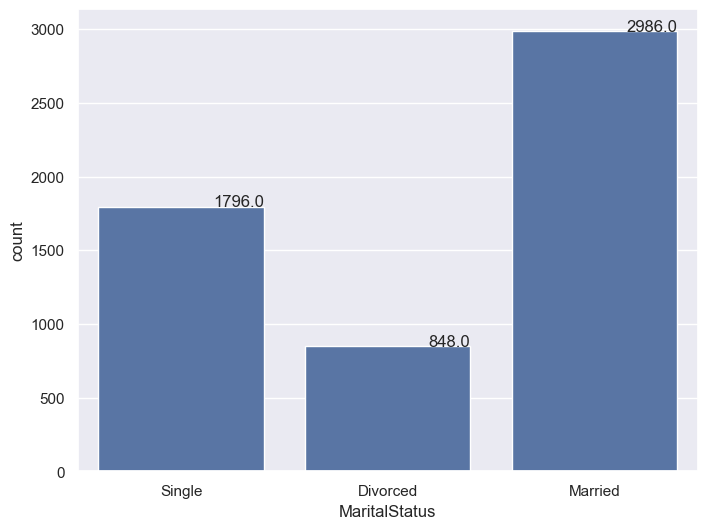

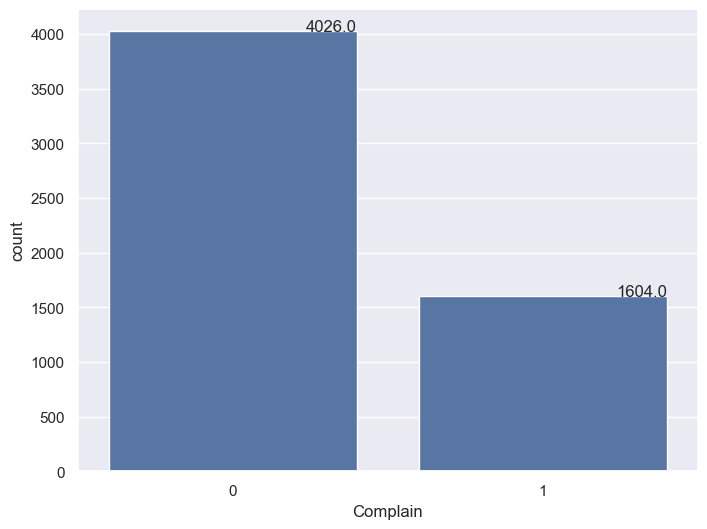

In [573]:
for i in df[cat].columns: 
    
    # If column is customerID do not plot
    if i == 'CustomerID':
            continue
        
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(df[cat], x=i)
    for p in ax.patches:
        ax.annotate(
        p.get_height(), (p.get_x() + p.get_width(), p.get_height()),
        ha = 'right'
        )
    plt.show()


#### Distribution of numerical variables

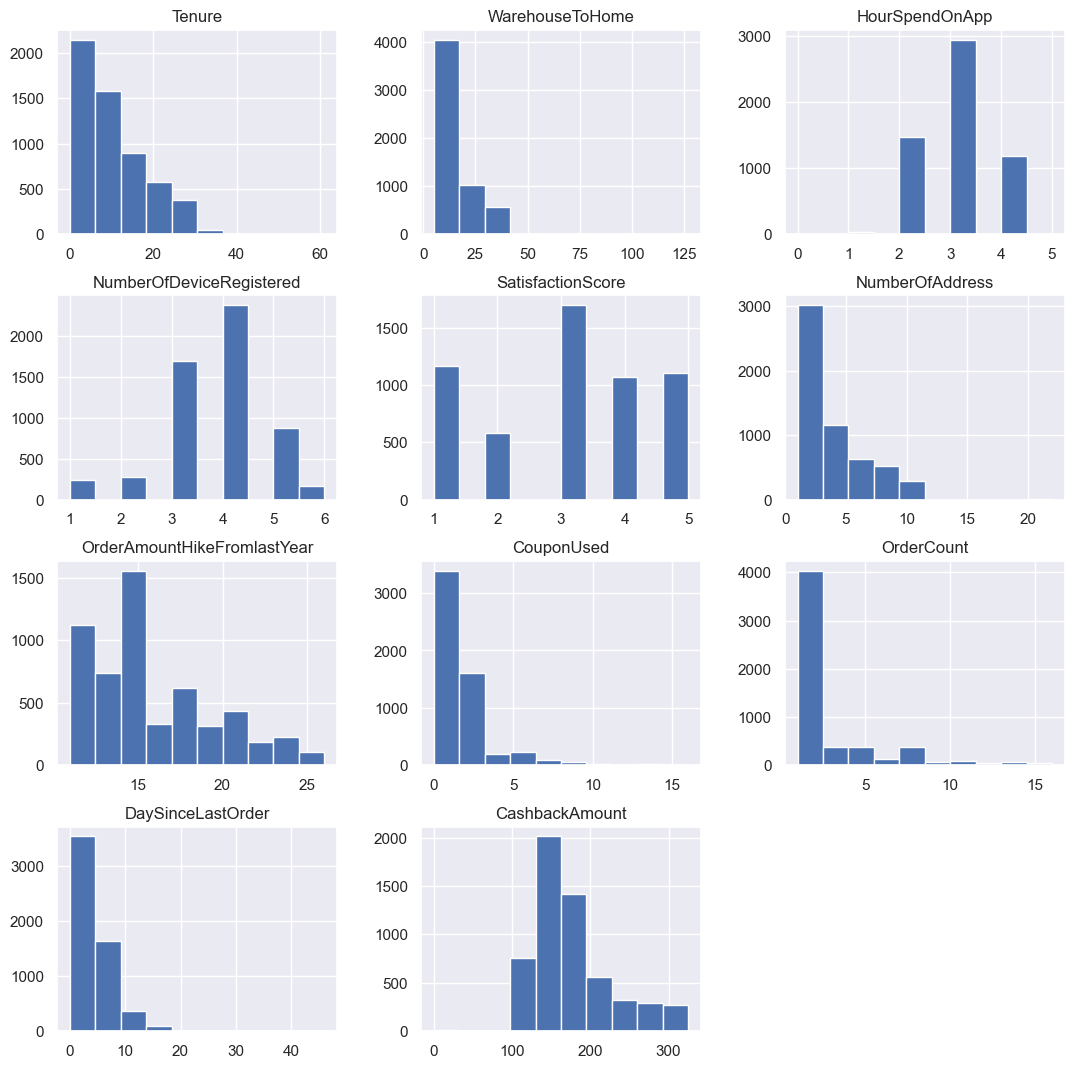

In [574]:
df[num].hist(figsize=(13,13))
plt.show()

### Outlier treatment

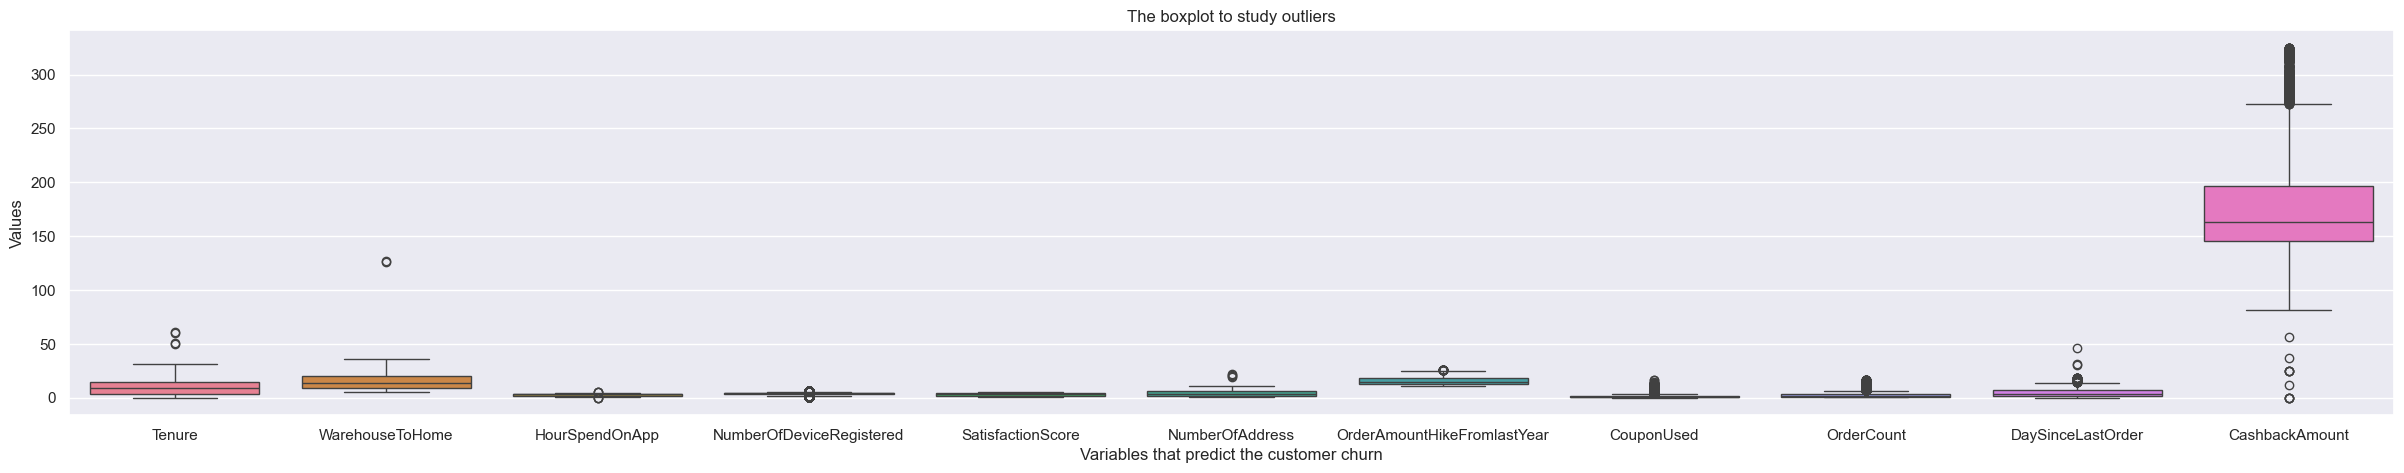

In [575]:
# Outlier detection
plt.figure(figsize=(30,5))
sns.boxplot(data=df[num])
plt.title('The boxplot to study outliers')
plt.xlabel('Variables that predict the customer churn')
plt.ylabel('Values')
plt.show()

In [576]:
# Outlier treatment
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lr= Q1-(1.5 * IQR)
    ur= Q3+(1.5 * IQR)
    return lr, ur

In [577]:
df[num].columns

Index(['Tenure', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

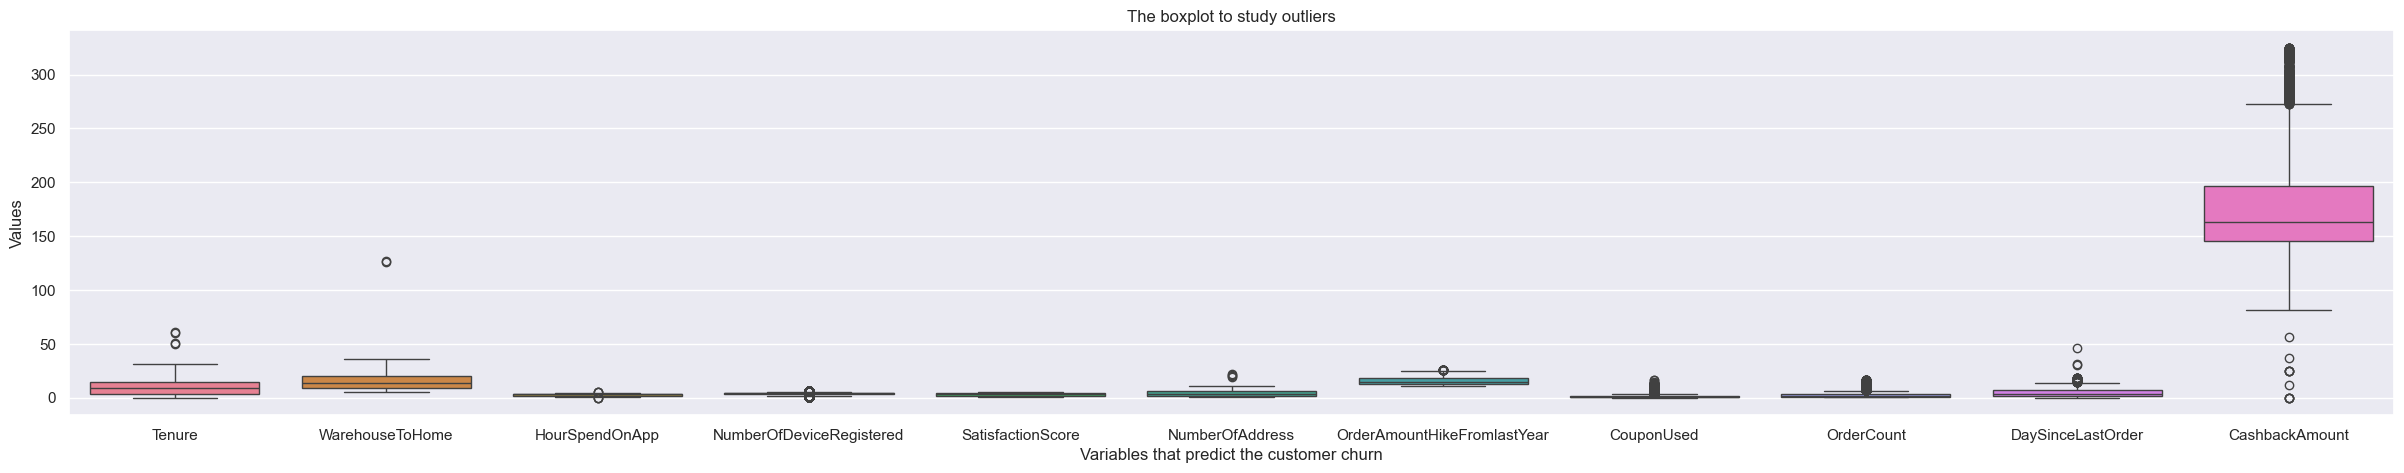

In [578]:
# Check again
plt.figure(figsize=(30,5))
sns.boxplot(data=df[num])
plt.title('The boxplot to study outliers')
plt.xlabel('Variables that predict the customer churn')
plt.ylabel('Values')
plt.show()

### Deeper dive into specific columns

In [579]:
def plot_stacked_bars(dataframe, title_, size_=(10, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

#### Total churn

In [580]:
churn = df[['CustomerID', 'Churn']]
churn.columns = ['', 'Churn']
churn_total = churn.groupby(churn['Churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100

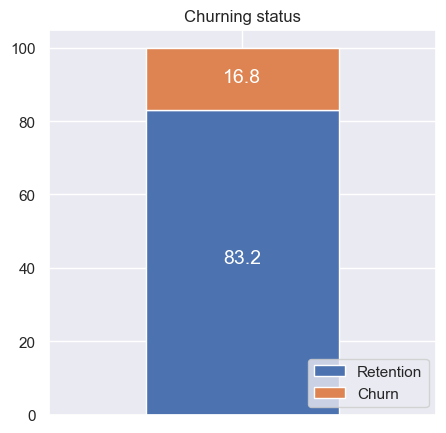

In [581]:
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

#### Churn rate by preferred login device

In [582]:
pld = df[['CustomerID', 'PreferredLoginDevice', 'Churn']]
pld = pld.groupby([pld['PreferredLoginDevice'], pld['Churn']])['CustomerID'].count().unstack(level=1).fillna(0)
pld_churn = (pld.div(pld.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

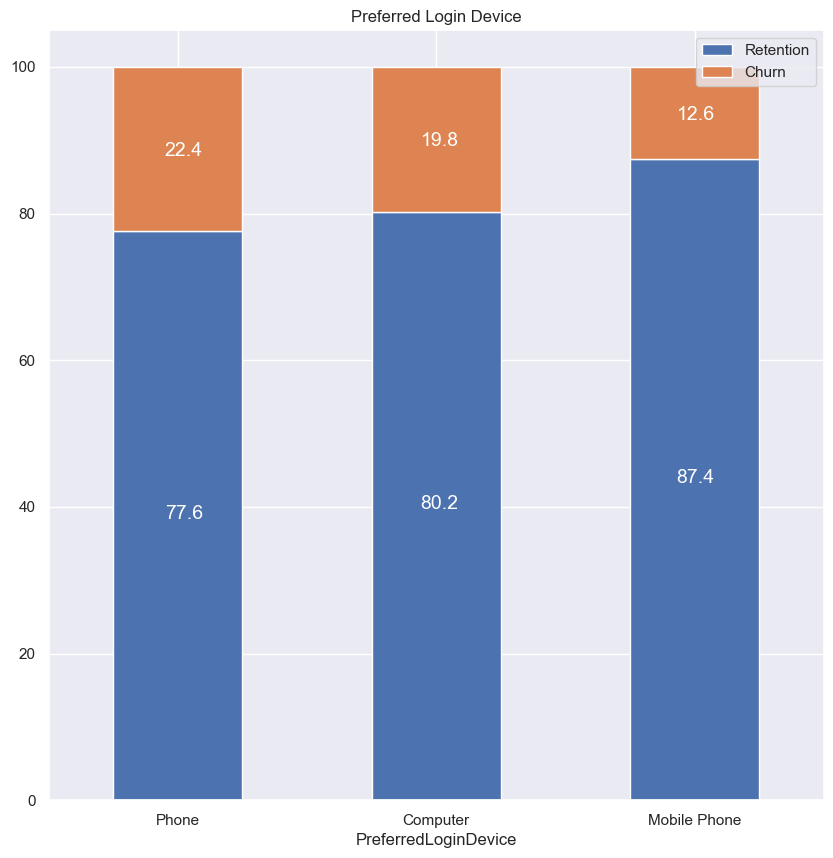

In [583]:
plot_stacked_bars(pld_churn, 'Preferred Login Device')

#### Churn rate by city tier

In [584]:
city = df[['CustomerID', 'CityTier', 'Churn']]
city = city.groupby([city['CityTier'], city['Churn']])['CustomerID'].count().unstack(level=1).fillna(0)
city_churn = (city.div(city.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

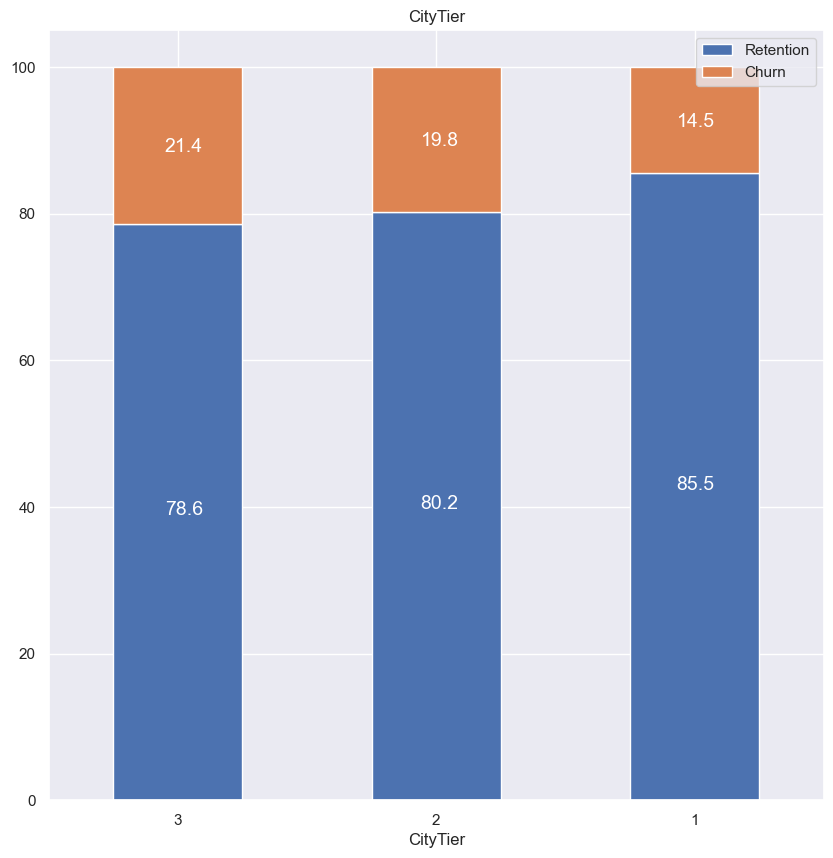

In [585]:
plot_stacked_bars(city_churn, 'CityTier')

#### Churn rate by Preferred Payment Mode

In [586]:
ppm = df[['CustomerID', 'PreferredPaymentMode', 'Churn']]
ppm = ppm.groupby([ppm['PreferredPaymentMode'], ppm['Churn']])['CustomerID'].count().unstack(level=1).fillna(0)
ppm_churn = (ppm.div(ppm.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

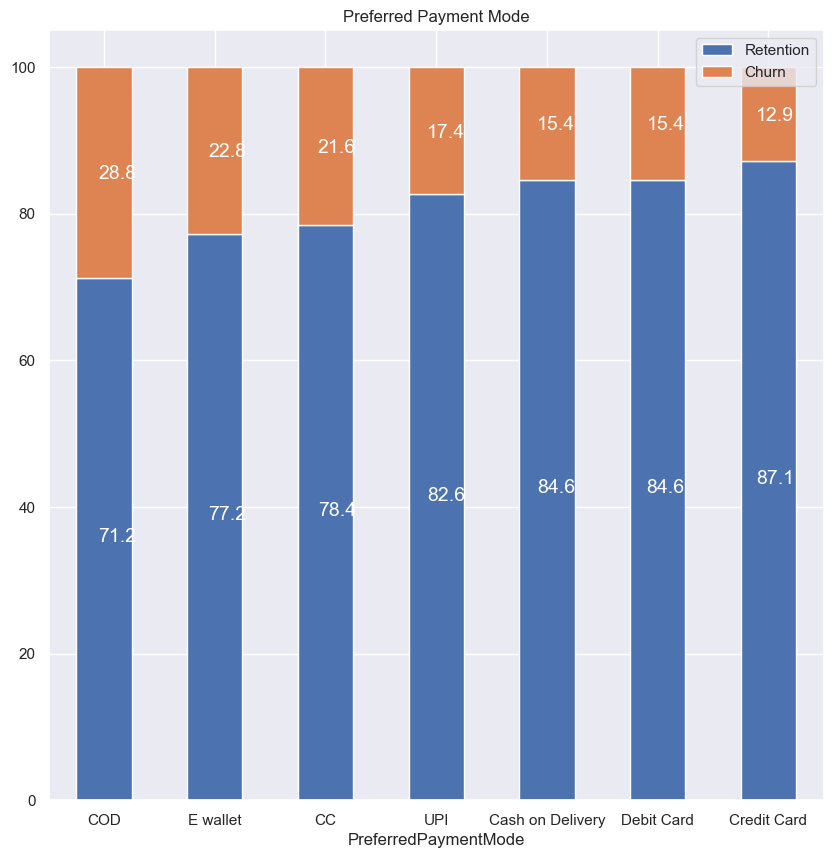

In [587]:
plot_stacked_bars(ppm_churn, 'Preferred Payment Mode')

#### Churn rate by gender

In [588]:
gender = df[['CustomerID', 'Gender', 'Churn']]
gender = gender.groupby([gender['Gender'], gender['Churn']])['CustomerID'].count().unstack(level=1).fillna(0)
gender_churn = (gender.div(gender.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

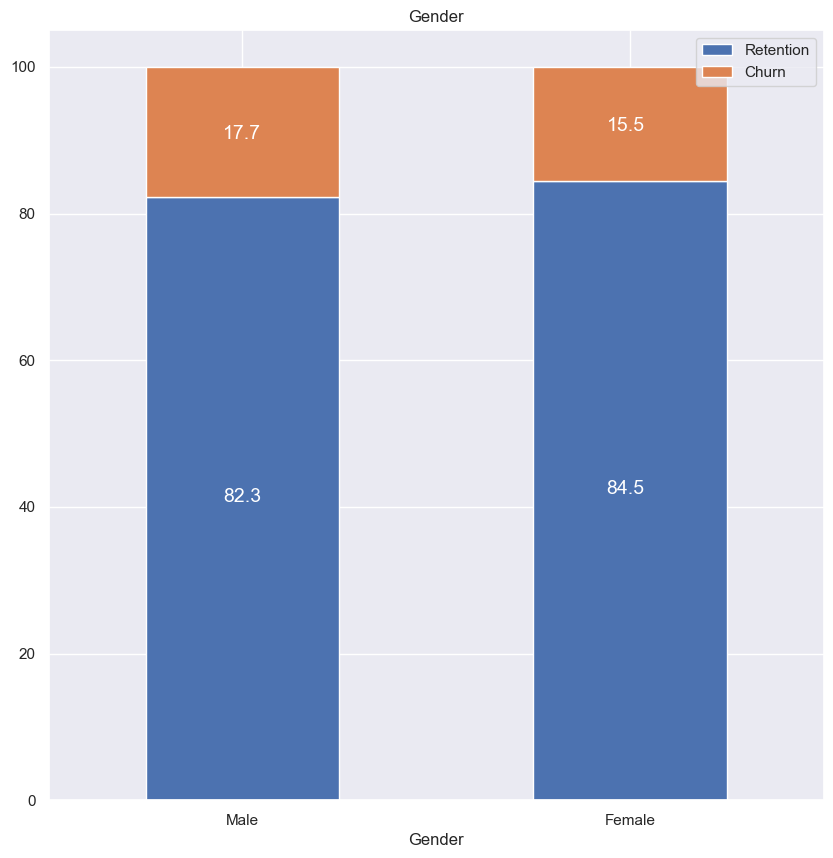

In [589]:
plot_stacked_bars(gender_churn, 'Gender')

#### Churn rate by prefered order category

In [590]:
poc = df[['CustomerID', 'PreferedOrderCat', 'Churn']]
poc = poc.groupby([poc['PreferedOrderCat'], poc['Churn']])['CustomerID'].count().unstack(level=1).fillna(0)
poc_churn = (poc.div(poc.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

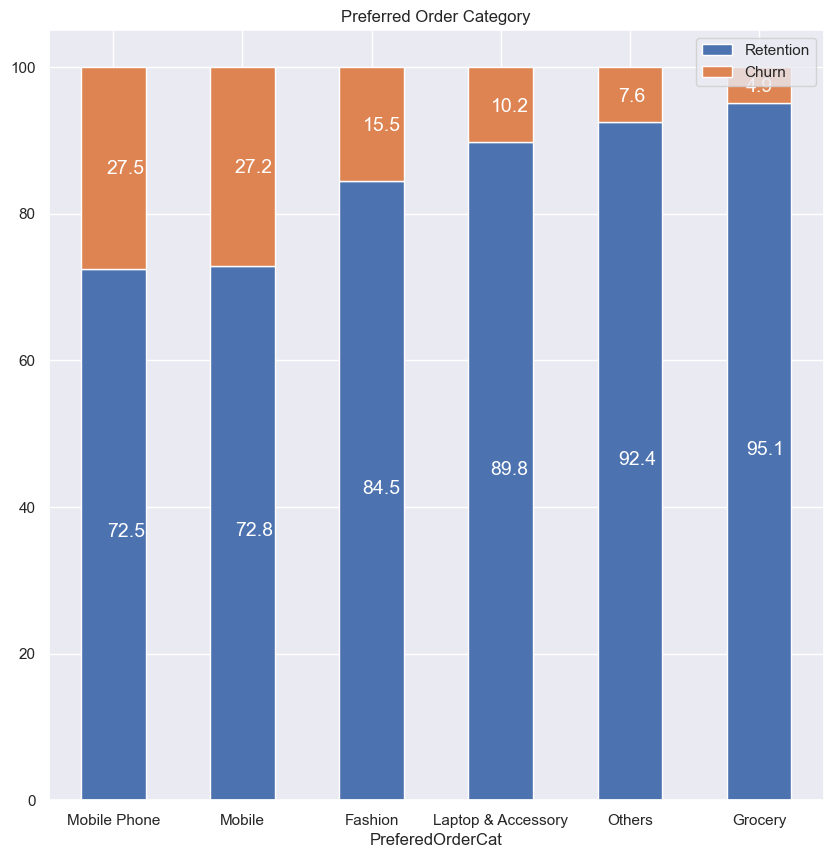

In [591]:
plot_stacked_bars(poc_churn, 'Preferred Order Category')

#### Churn rate by marital status

In [592]:
ms = df[['CustomerID', 'MaritalStatus', 'Churn']]
ms = ms.groupby([ms['MaritalStatus'], ms['Churn']])['CustomerID'].count().unstack(level=1).fillna(0)
ms_churn = (ms.div(ms.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

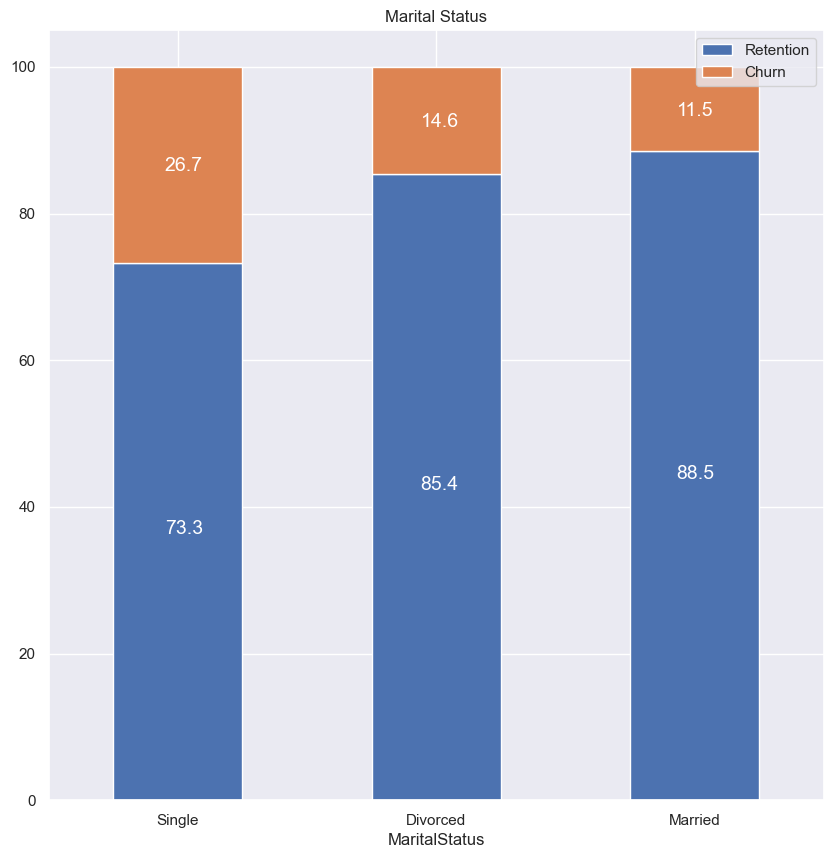

In [593]:
plot_stacked_bars(ms_churn, 'Marital Status')

#### Churn rate by complain status

In [594]:
cp = df[['CustomerID', 'Complain', 'Churn']]
cp = cp.groupby([cp['Complain'], cp['Churn']])['CustomerID'].count().unstack(level=1).fillna(0)
cp_churn = (cp.div(cp.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

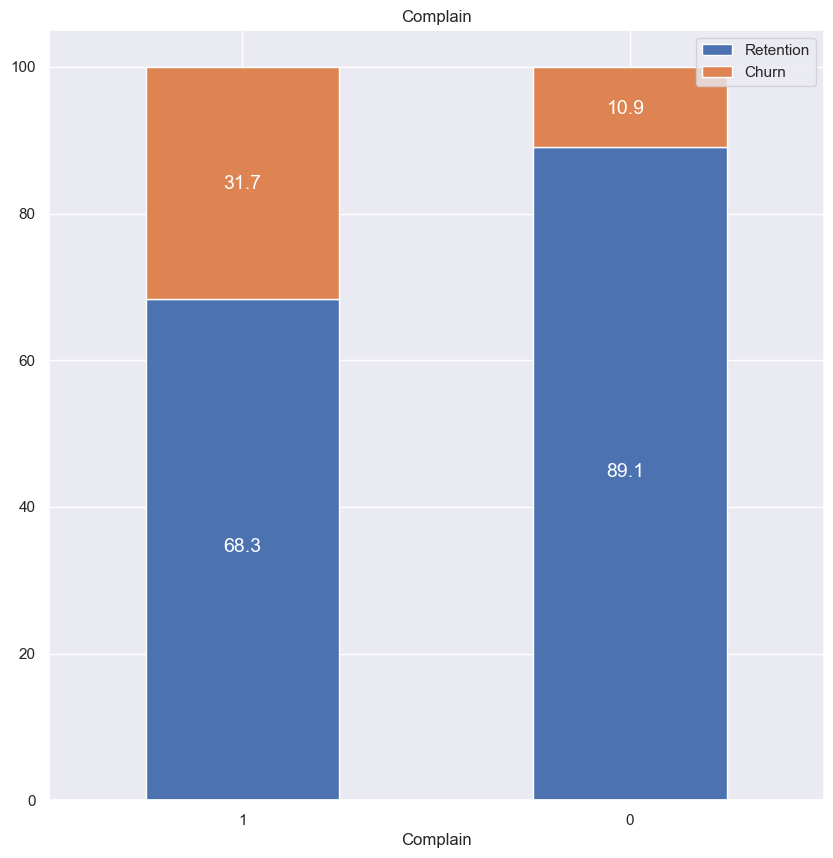

In [595]:
plot_stacked_bars(cp_churn, 'Complain')

#### Churn rate by tenure

In [596]:
def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distribution in a stacked histogram of churned or retained customer
    """
    # Create a temporary dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["Churn"]==0][column],
    "Churn":dataframe[dataframe["Churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

In [597]:
tenure = df[['CustomerID', 'Tenure', 'Churn']]

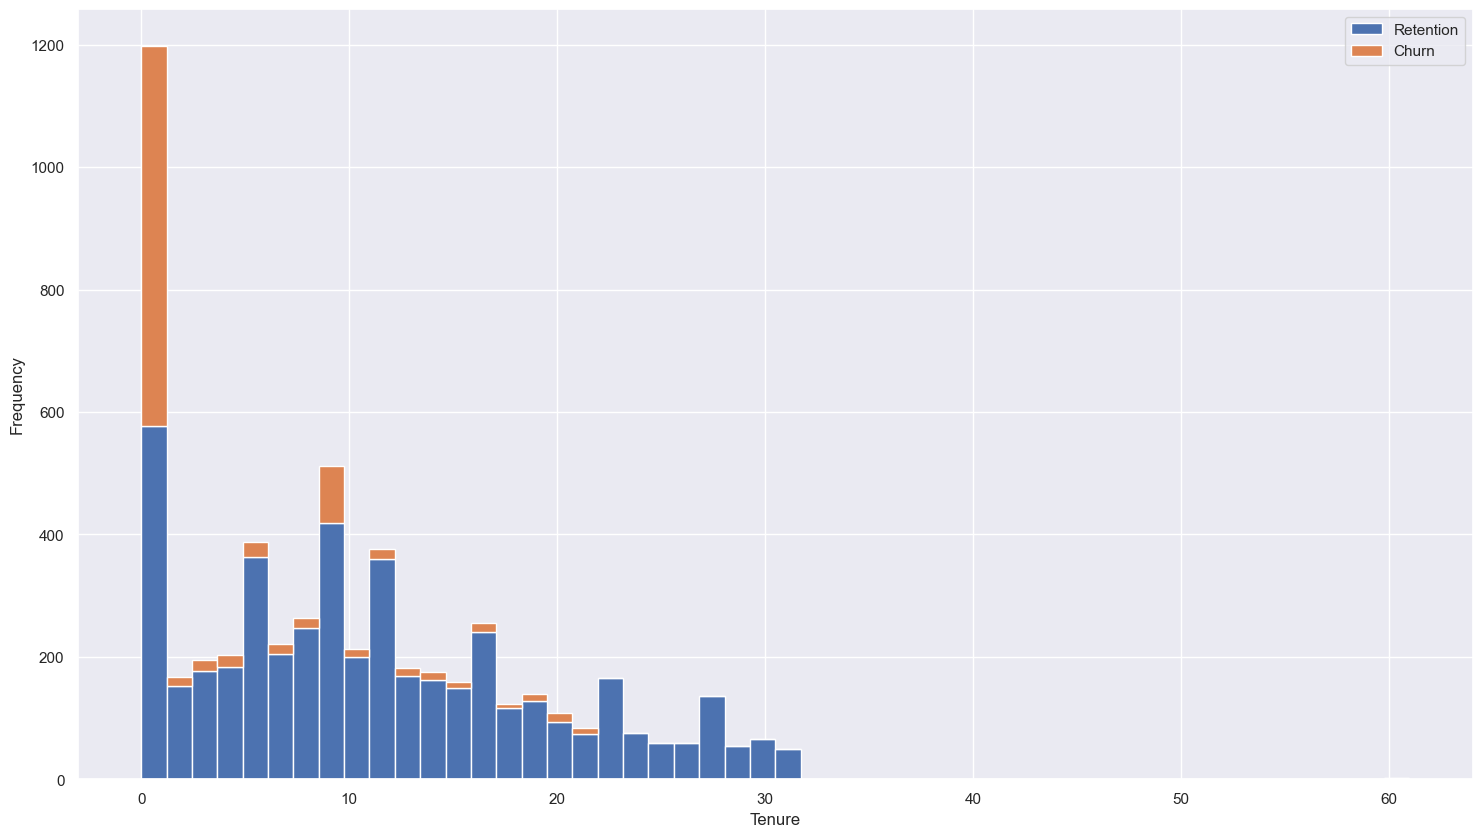

In [598]:
fig, axs = plt.subplots(nrows=1, figsize=(18, 10))
plot_distribution(tenure, 'Tenure', axs)
plt.show()

#### Churn rate by coupon used

In [599]:
coupon = df[['CustomerID', 'CouponUsed', 'Churn']]

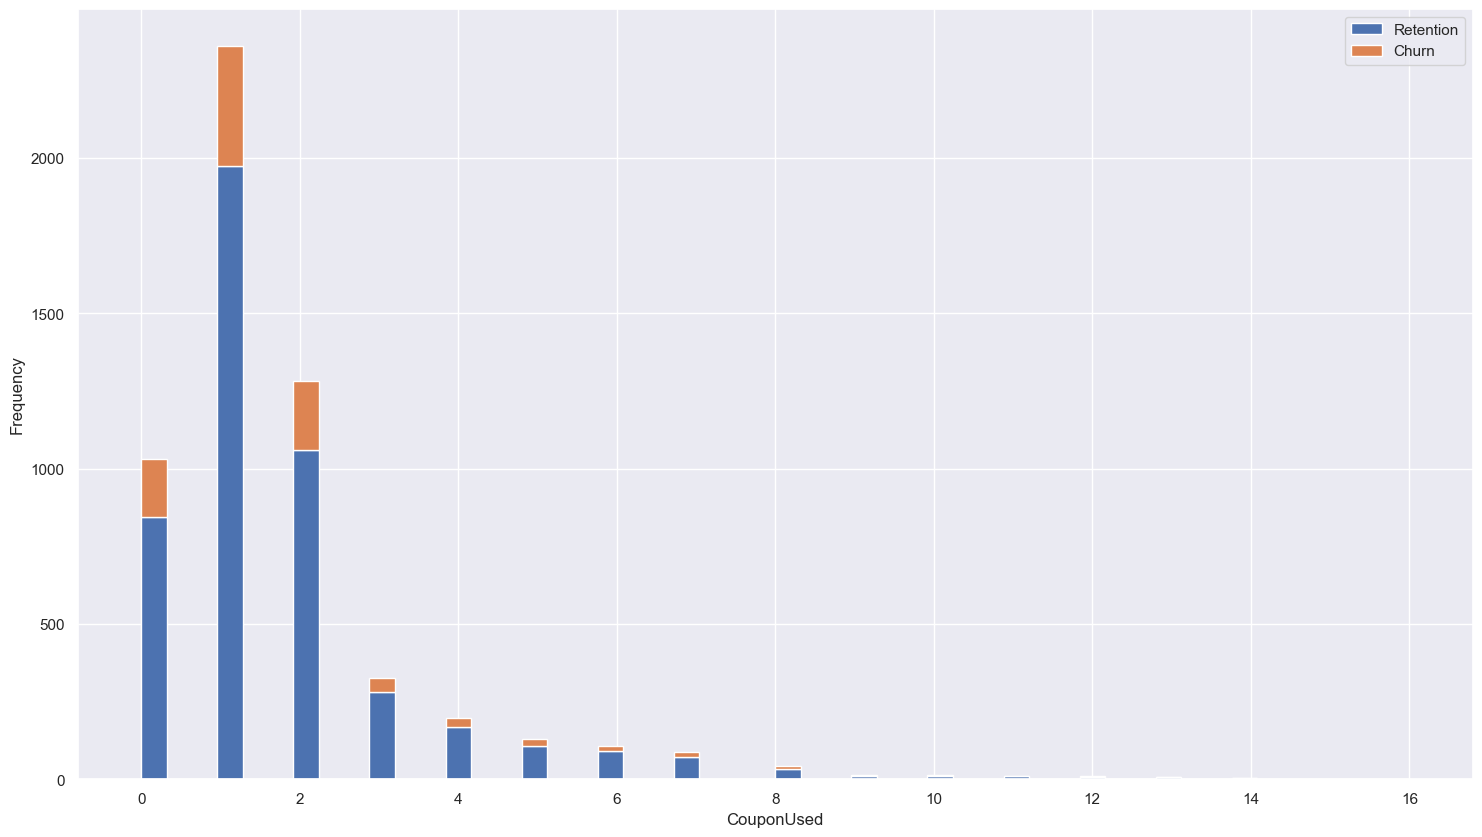

In [600]:
fig, axs = plt.subplots(nrows=1, figsize=(18, 10))
plot_distribution(coupon, 'CouponUsed', axs)
plt.show()

#### Churn rate by satisfaction score

In [607]:
ss = df[['CustomerID', 'SatisfactionScore', 'Churn']]

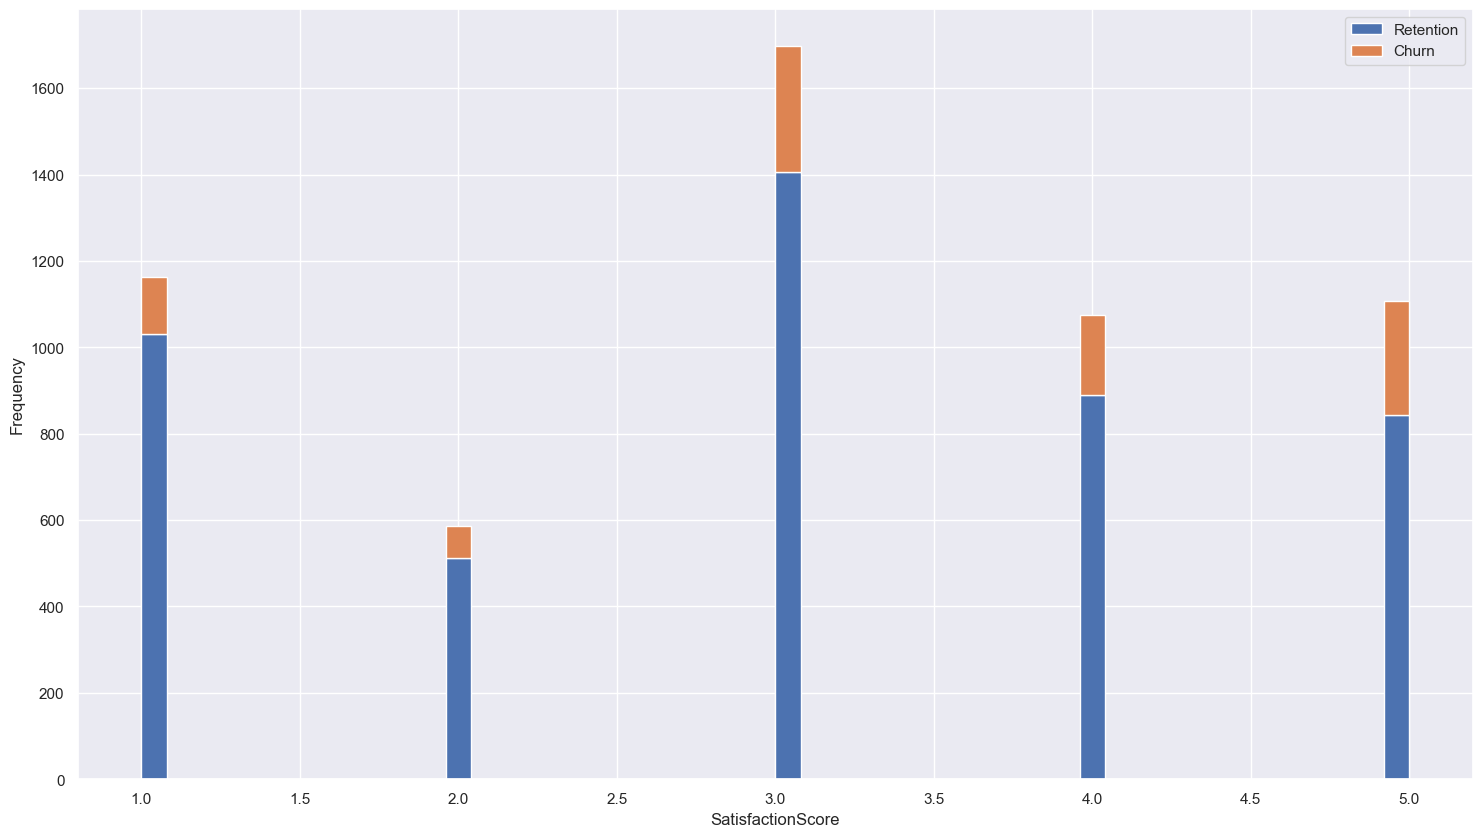

In [610]:
fig, axs = plt.subplots(nrows=1, figsize=(18, 10))
plot_distribution(ss, 'SatisfactionScore', axs)
plt.show()

### Correlation

In [615]:
df[cat].head()

,CustomerID,Churn,PreferredLoginDevice,CityTier,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus,Complain
0,50001,1,Mobile Phone,3,Debit Card,Female,Laptop & Accessory,Single,1
1,50002,1,Phone,1,UPI,Male,Mobile,Single,1
2,50003,1,Phone,1,Debit Card,Male,Mobile,Single,1
3,50004,1,Phone,3,Debit Card,Male,Laptop & Accessory,Single,0
4,50005,1,Phone,1,CC,Male,Mobile,Single,0


In [617]:
df = df.drop(columns=['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus', 'Complain'])
df.head()

,CustomerID,Churn,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,6.0,3.0,3,2,9,11.0,1.0,1.0,5.0,159.93
1,50002,1,9.0,8.0,3.0,4,3,7,15.0,0.0,1.0,0.0,120.90
2,50003,1,9.0,30.0,2.0,4,3,6,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,15.0,2.0,4,5,8,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,12.0,3.0,3,5,3,11.0,1.0,1.0,3.0,129.60


In [630]:
correlation = df.corr()

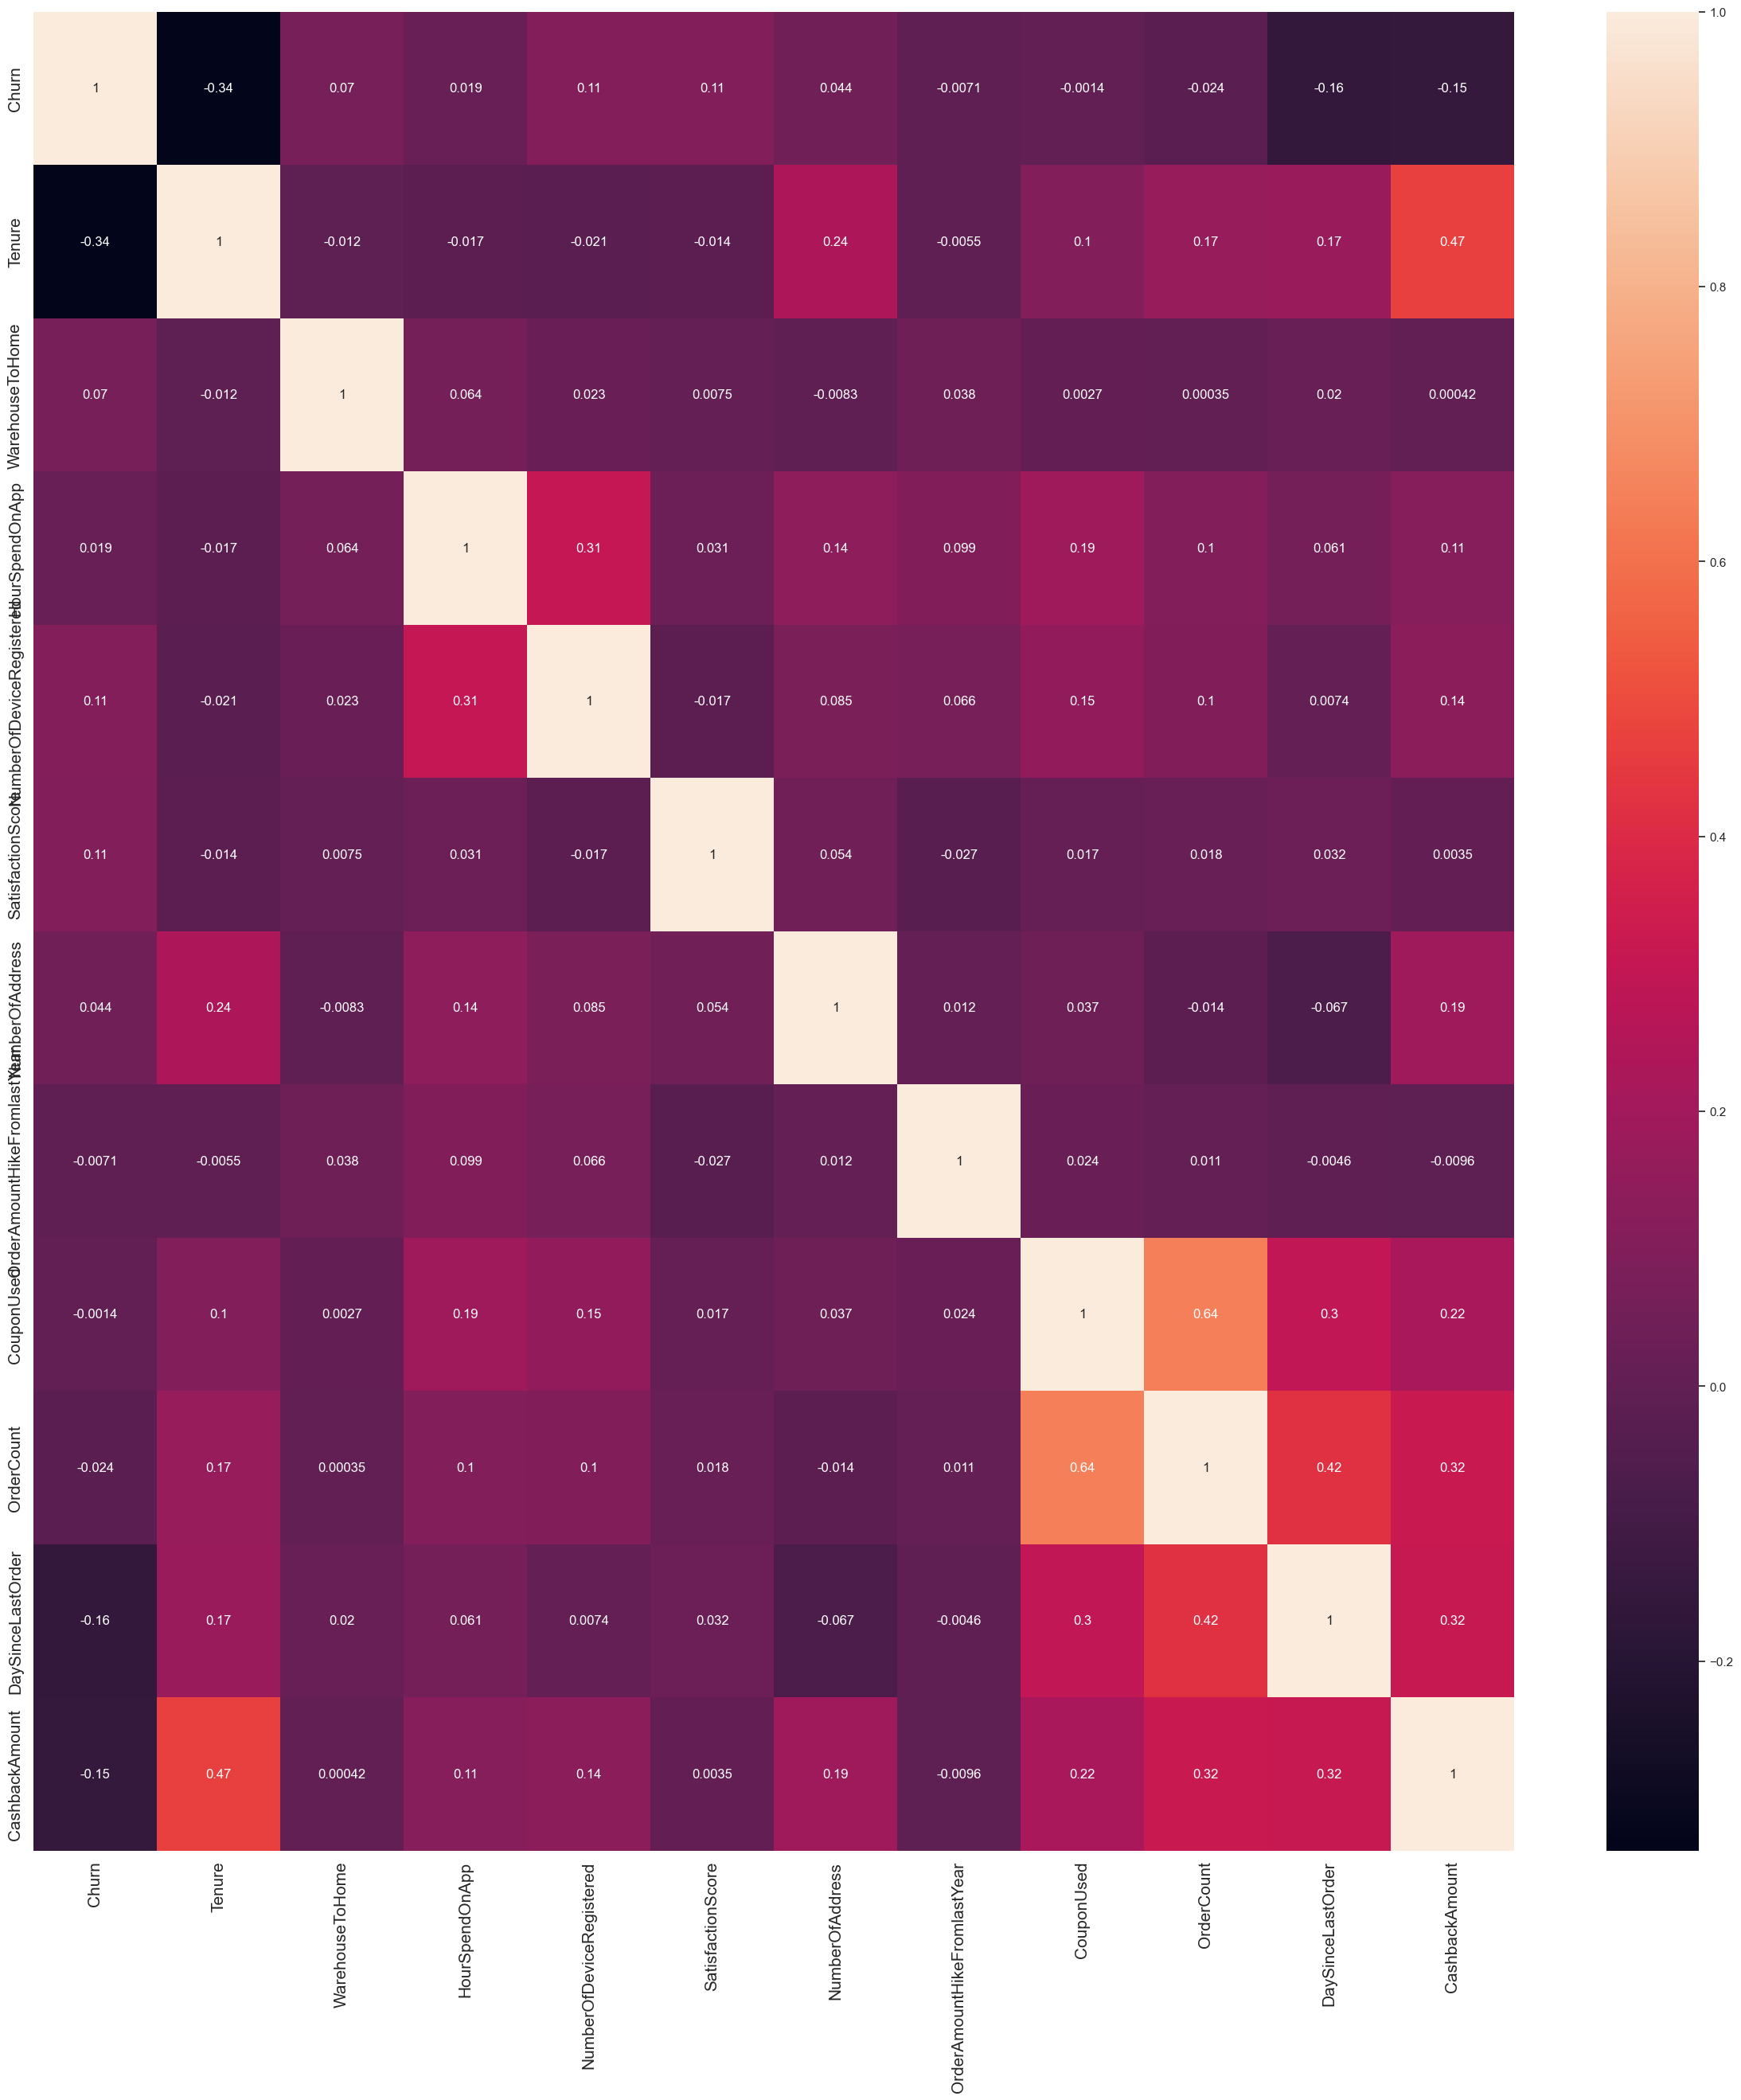

In [631]:
# Plot correlation
plt.figure(figsize=(30, 30))
sns.heatmap(
    correlation, 
    xticklabels=correlation.columns.values,
    yticklabels=correlation.columns.values, 
    annot=True, 
    annot_kws={'size': 12}
)
# Axis ticks size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()